In [18]:
# Os resultados corretos para cada imagem
# Adicionar o nome + .png e o número correspondente
image_result = {
    "zero.png": 0,
    "one.png": 1,
    "two.png": 2,
    "three.png": 3,
    "four.png": 4,
    "five.png": 5,
    "six.png": 6,
    "seven.png": 7,
    "eight.png": 8,
    "nine.png": 9
}

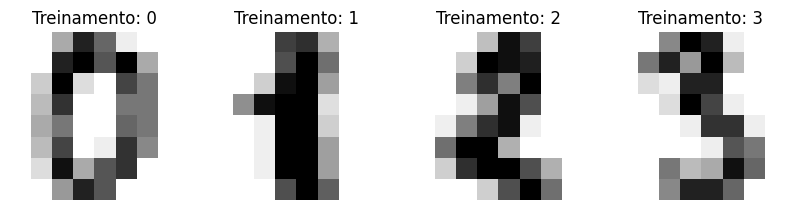

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from PIL import Image
from skimage import exposure

import os
import seaborn as sn
import PIL.ImageOps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Carrega o dataset de digitos
digits = load_digits()

ex = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))[1]
for ax, image, label in zip(ex, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Treinamento: %i" % label)


Melhores parâmetros: {'n_neighbors': np.int64(1), 'weights': 'uniform'}


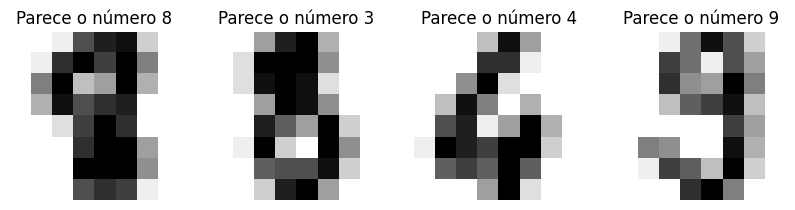

In [20]:
# Carregar o conjunto de dados dos dígitos
digits = load_digits()

# Achatar as imagens
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Dividir os dados em 50% de subconjuntos de treinamento e 50% de subconjuntos de teste
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Configurar os parâmetros para o GridSearch
param_grid = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance']
}

# Criar o classificador k-NN
knn = KNeighborsClassifier()

# Usar GridSearchCV para encontrar os melhores parâmetros
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimir os melhores parâmetros encontrados pelo GridSearchCV
print("Melhores parâmetros:", grid_search.best_params_)

# Prever o valor do dígito no subconjunto de teste com os melhores parâmetros
predicted = grid_search.predict(X_test)

# Visualizar os resultados
ex = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))[1]
for ax, image, prediction in zip(ex, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Parece o número {prediction}")

plt.show()



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.96      0.97      0.96        91
           2       0.99      0.97      0.98        86
           3       0.91      0.92      0.92        91
           4       0.99      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.99      0.99      0.99        89
           8       0.94      0.92      0.93        88
           9       0.91      0.93      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



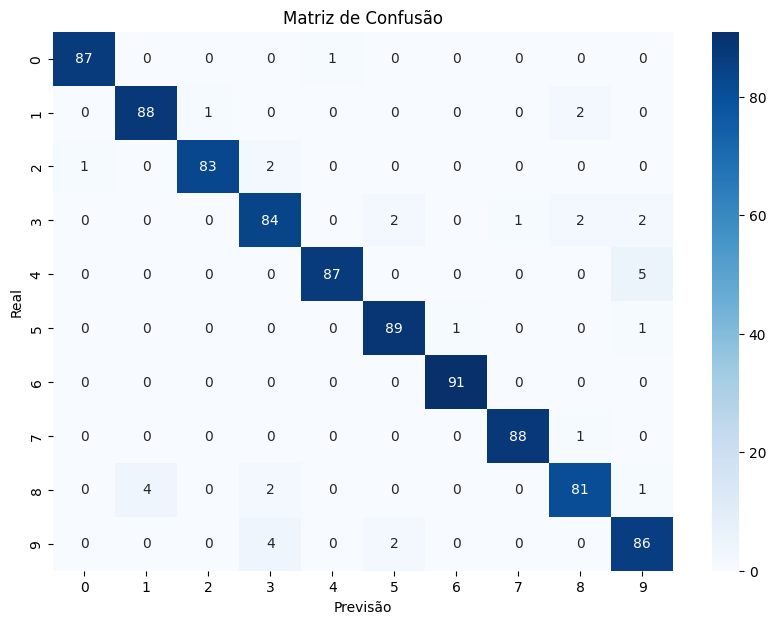

In [21]:
# Avaliar o desempenho no conjunto de teste
y_pred = grid_search.predict(X_test)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Imprimir matriz de confusão e relatório de classificação
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão com seaborn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


Pega uma imagem aleatória representando um número da pasta letters, exibe a imagem e tenta predizer qual número representa

Melhores parâmetros: n° vizinhos=3 e peso=uniform


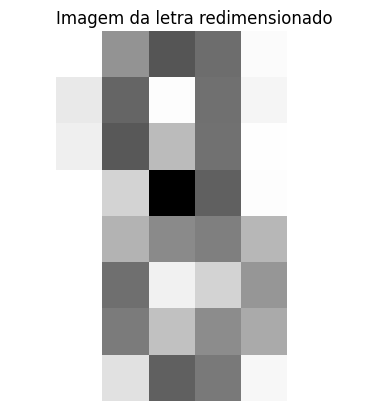

A letra prevista é 8



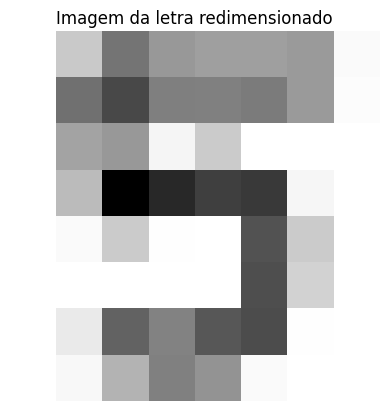

A letra prevista é 9



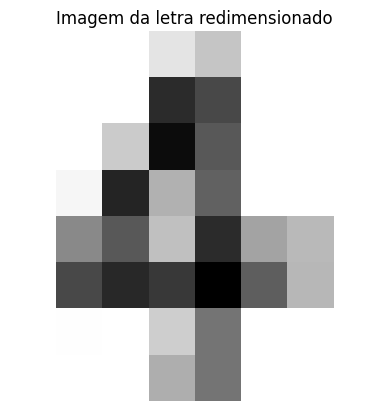

A letra prevista é 4



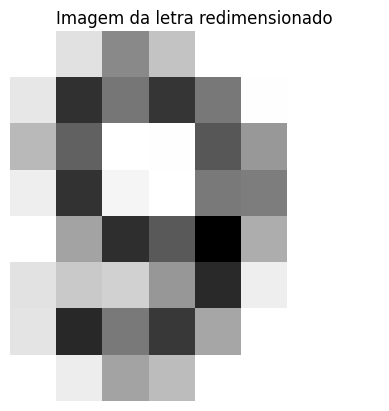

A letra prevista é 1



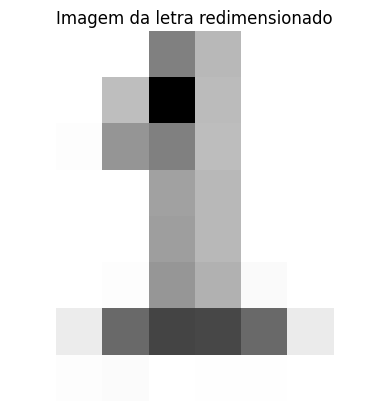

A letra prevista é 1



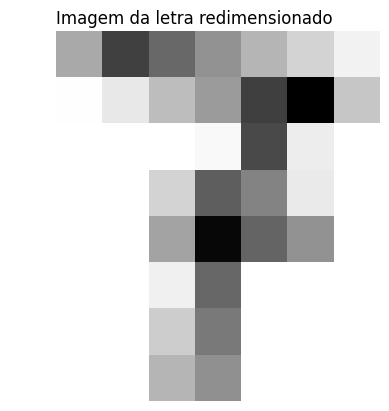

A letra prevista é 7



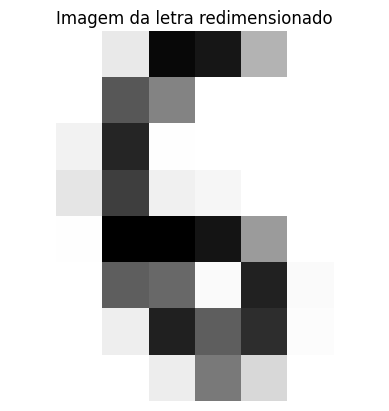

A letra prevista é 6



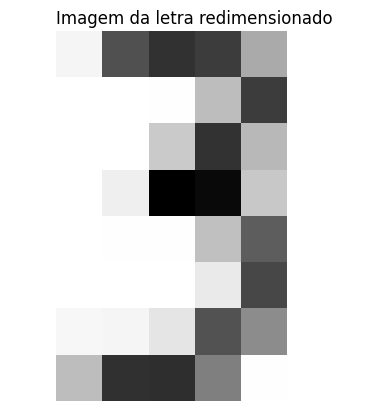

A letra prevista é 3



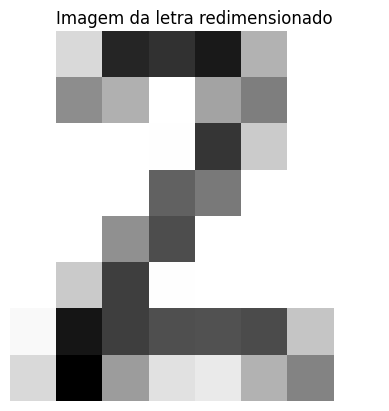

A letra prevista é 2



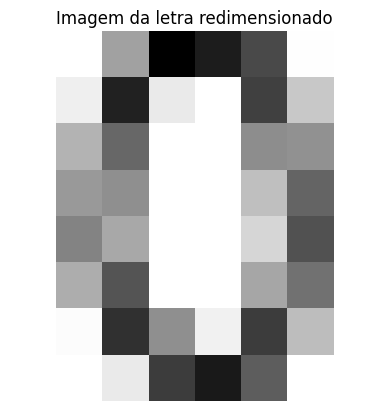

A letra prevista é 0



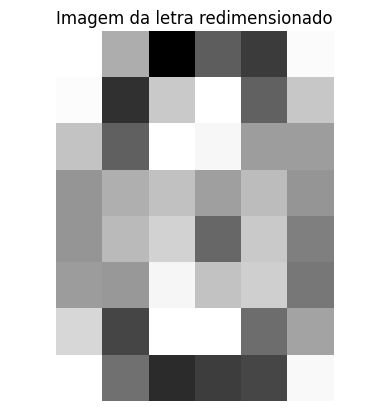

A letra prevista é 0



In [22]:
def preprocess_letter_image(image_path):
    # Carregar a imagem e converter para escala de cinza
    letter_image = Image.open(image_path).convert('L')

    # Redimensionar a imagem para o tamanho alvo
    letter_image = letter_image.resize((8, 8))

    # Inverter as cores
    letter_image = PIL.ImageOps.invert(letter_image)
    
    # Converter a imagem para um array numpy
    letter_image_array = np.array(letter_image)

    # Aplicar equalização de histograma para evidenciar mais os tons escuros
    letter_image_array = exposure.equalize_hist(letter_image_array)
    
    return np.array(letter_image).reshape(8, 8)

# Carregar e processar a imagem da letra
letter_images = [f for f in os.listdir('digits/') if f.endswith('.png')]

# Carregar o conjunto de dados dos dígitos
digits = load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Dividir os dados de subconjuntos de treinamento e de subconjuntos de teste
X_train, X_test, y_train, y_test = train_test_split(data, digits.target)

# Configurar os parâmetros para o GridSearch
param_grid = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance']
}

# Criar o classificador k-NN
knn = KNeighborsClassifier()

# Usar GridSearchCV para encontrar os melhores parâmetros
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimir os melhores parâmetros encontrados pelo GridSearchCV
bp = grid_search.best_params_
print(f"Melhores parâmetros: n° vizinhos={bp['n_neighbors']} e peso={bp['weights']}")

letter_results = [[], []]

for letter_image in letter_images:
    proccessed_letter_image = preprocess_letter_image(os.path.join('digits/', letter_image))

    plt.imshow(proccessed_letter_image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Imagem da letra redimensionado")
    plt.axis('off')
    plt.show()

    # Achatar a imagem da letra para fazer a previsão
    d_image = proccessed_letter_image.reshape(1, -1)

    # Prever a letra com os melhores parâmetros
    y_pred = grid_search.predict(d_image)
    
    if (letter_image in image_result):
        letter_results[0].append(y_pred)
        letter_results[1].append(image_result[letter_image])

    print(f"A letra prevista é {y_pred[0]}")
    print()


In [24]:
accuracy = accuracy_score(letter_results[0], letter_results[1])
print("Acuracia = " + str(accuracy))

Acuracia = 0.8
